### The following sources have been used:

Getting an idea how XGB can be applied: <br>
- https://www.kaggle.com/rohansadale/xgbclassifier-and-randomforest-in-python

Early stopping: <br>
- https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

Tuning parameters: <br>
- https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
- https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde

Code copied to plot the confusion matrix at a fancy way: <br>
- https://medium.com/@gabrielziegler3/multiclass-multilabel-classification-with-xgboost-66195e4d9f2d

# XGBoost

Algorithm to train and build the XGBboost model to determine how well this model performs on the train dataset

In [56]:
import pandas as pd

train_data = pd.read_csv('../Datasets/oneHotEncoded_dataset.csv')
train_data['AgeuponOutcome'].fillna(-1, inplace=True)

y = train_data.OutcomeType
train_data = train_data.drop(['OutcomeType', 'OutcomeTypeString'], axis = 1)
X = train_data

In [57]:
# Oversampling the data using BorderlineSMOTE

from imblearn.over_sampling import BorderlineSMOTE

bsm = BorderlineSMOTE(random_state = 42)
X, y = bsm.fit_sample(X, y)

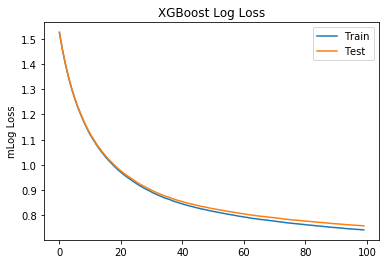

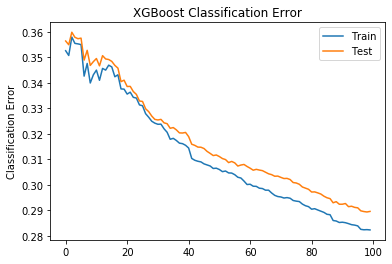

Recall: 0.71%
Precision: 0.73%


In [58]:
# Used to determine the amount of iterations the model should do, based on the learning curve. When the learning curve
# stabalizes, the learning should stop, because continue learning doesn't increase the accuracy but takes a lot of time

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror", "mlogloss"]

model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose = False)
predictions = model.predict(X_test)

recall = recall_score(y_test, predictions, average = 'weighted')
precision = precision_score(y_test, predictions, average = 'weighted')

results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('mLog Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

print("Recall: %.2f%%" % (recall))
print("Precision: %.2f%%" % (precision))

In [ ]:
# Needs to be used to tune the parameters. However, because of the size of the dateset, this takes ages.
# Therefore, the parameters are tunes manually

from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X, y)
model.dump_model('dump.raw.txt')

In [54]:
# Fitting the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = XGBClassifier(
    learning_rate = 0.03,
    n_estimators = 500,
    max_depth = 6,
    gamma = 0.3,
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'multi:softprob',
    nthread = 4,
    seed = 43)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

recall = recall_score(y_test, predictions, average = 'weighted')
precision = precision_score(y_test, predictions, average = 'weighted')

In [55]:
# Calculations for the precision, recall and accuracy

y_class0 = y_test[y_test == 0]
y_class1 = y_test[y_test == 1]
y_class2 = y_test[y_test == 2]
y_class3 = y_test[y_test == 3]
y_class4 = y_test[y_test == 4]

prediction_class0 = predictions[y_test == 0]
prediction_class1 = predictions[y_test == 1]
prediction_class2 = predictions[y_test == 2]
prediction_class3 = predictions[y_test == 3]
prediction_class4 = predictions[y_test == 4]

# precision calculations
precision_class0 = precision_score(y_class0,prediction_class0, average = 'weighted')
precision_class1 = precision_score(y_class1,prediction_class1, average = 'weighted')
precision_class2 = precision_score(y_class2,prediction_class2, average = 'weighted')
precision_class3 = precision_score(y_class3,prediction_class3, average = 'weighted')
precision_class4 = precision_score(y_class4,prediction_class4, average = 'weighted')

# recall calculations    
recall_class0 = recall_score(y_class0,prediction_class0, average = 'weighted')
recall_class1 = recall_score(y_class1,prediction_class1, average = 'weighted')
recall_class2 = recall_score(y_class2,prediction_class2, average = 'weighted')
recall_class3 = recall_score(y_class3,prediction_class3, average = 'weighted')
recall_class4 = recall_score(y_class4,prediction_class4, average = 'weighted')


# accuracy calculations
accuracy_class0 = accuracy_score(y_class0,prediction_class0)
accuracy_class1 = accuracy_score(y_class1,prediction_class1)
accuracy_class2 = accuracy_score(y_class2,prediction_class2)
accuracy_class3 = accuracy_score(y_class3,prediction_class3)
accuracy_class4 = accuracy_score(y_class4,prediction_class4)

accuracy = accuracy_score(y_test, predictions)
print('Class zero has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class0,recall_class0,accuracy_class0))
print('Class one has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class1,recall_class1,accuracy_class1))
print('Class two has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class2,recall_class2,accuracy_class2))
print('Class three has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class3,recall_class3,accuracy_class3))
print('Class four has presicion of {0}, recall of {1} and accuracy of {2}'.format(precision_class4,recall_class4,accuracy_class4))
print('The overall precision is {0} and the overall recall is {1} and accuracy {2}'.format(precision,recall, accuracy))

Class zero has presicion of 1.0, recall of 0.7715430861723447 and accuracy of 0.7715430861723447
Class one has presicion of 1.0, recall of 0.9847560975609756 and accuracy of 0.9847560975609756
Class two has presicion of 1.0, recall of 0.7118055555555556 and accuracy of 0.7118055555555556
Class three has presicion of 1.0, recall of 0.7457907811206183 and accuracy of 0.7457907811206183
Class four has presicion of 1.0, recall of 0.550292560601839 and accuracy of 0.550292560601839
The overall precision is 0.7643821013573241 and the overall recall is 0.753278181101919 and accuracy 0.753278181101919


C:\Users\evert\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


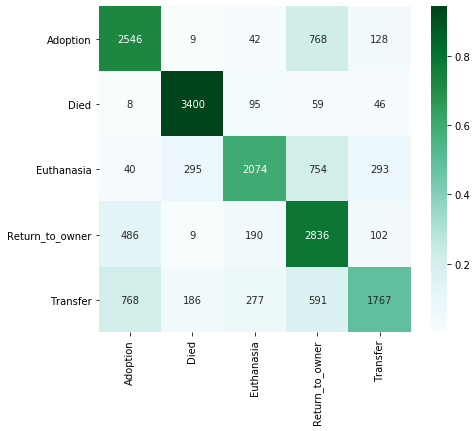

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

def plot_confusion_matrix(cm, classes, normalized=True, cmap='BuGn'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm, ['Adoption', 'Died', 'Euthanasia', 'Return_to_owner','Transfer'])